### IMPORTING THE LIBRABRIES

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

### LOADING THE DATASET

In [73]:
data1 = pd.read_csv('train.csv')
data2= pd.read_csv('test.csv')
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [75]:
data1.shape, data2.shape

((1460, 81), (1459, 80))

### CONCATENATING BOTH DATAFRAMES

In [76]:
data= pd.concat((data1,data2))

C:\Users\anike\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [77]:
#You can also check the data set information using the info() command. 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

### CHECKING MISSING VALUES

In [78]:
data.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley            2721
BedroomAbvGr        0
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFinType1       79
BsmtFinType2       80
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           81
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            4
MasVnrArea         23
MasVnrType         24
MiscFeature      2814
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive          0
PoolArea  

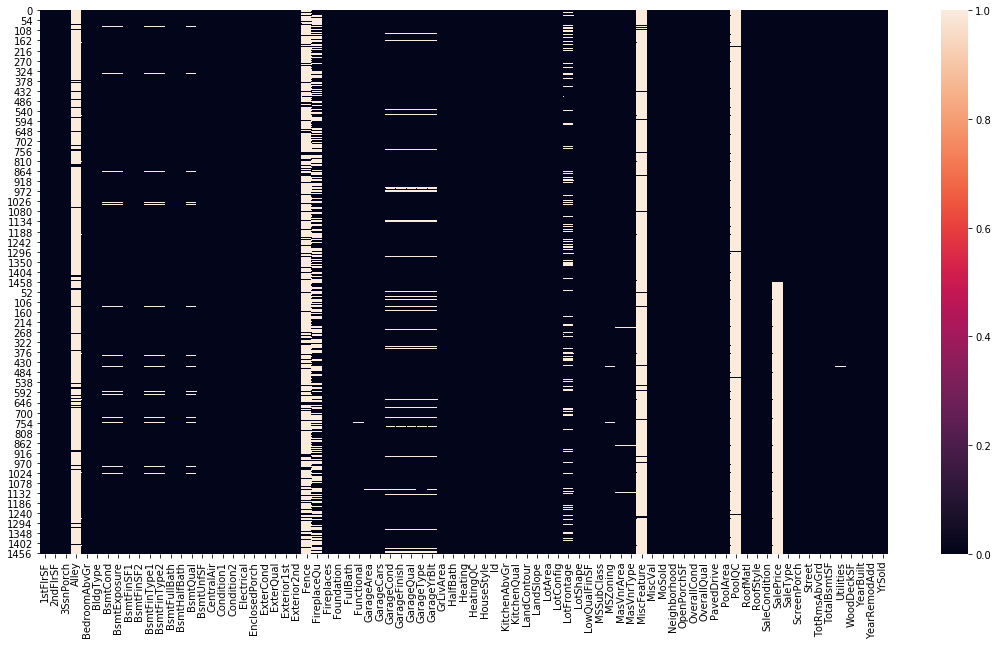

In [79]:
plt.figure(figsize=(19,10))
sns.heatmap(data.isnull())

### HANDLING MISSING VALUES

In [80]:
data.drop(['Id','PoolQC','Fence','Alley','GarageYrBlt','MiscFeature',], axis=1, inplace=True)

In [81]:
data['BsmtCond'].fillna(data["BsmtCond"].mode(), inplace = True)

In [82]:
data['MasVnrArea'].fillna(data["MasVnrArea"].mode(), inplace = True)

In [83]:
data['BsmtExposure'].fillna(data["BsmtExposure"].mode(), inplace = True)

In [84]:
data['BsmtFinType2'].fillna(data["BsmtFinType2"].mode(), inplace = True)

In [85]:
data['BsmtQual'].fillna(data["BsmtQual"].mode(), inplace = True)

In [86]:
data['LotFrontage'].fillna(data["LotFrontage"].mean(), inplace = True)

### For categorical data replace null values with the most frequently used value of each feature.

In [87]:
categorical= data.select_dtypes(include=['object'])

### For numerical data replace null values with the mean value of each feature.


In [88]:
numerical= data.select_dtypes(['int64','float64'])

In [89]:
for i in categorical:
    data[i]=data[i].fillna(data[i].mode()[0])

In [90]:
for i in numerical:
    data[i]=data[i].fillna(data[i].mean())

In [91]:
data = data.drop(['YrSold','LowQualFinSF','MiscVal','BsmtHalfBath','BsmtFinSF2','3SsnPorch','MoSold'],axis=1)

In [92]:
data.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
                ..
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotConfig        0
LotFrontage      0
LotShape         0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SalePrice        0
SaleType    

In [93]:
data.head(2)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtFullBath,...,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd
0,856,854,3,1Fam,TA,No,706.0,GLQ,Unf,1.0,...,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003
1,1262,0,3,1Fam,TA,Gd,978.0,ALQ,Unf,0.0,...,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976


### Convert categorical data into numerical format.

In [94]:
data = pd.get_dummies(data).reset_index(drop=True)
data.shape

(2919, 268)

### Model Building.

In [95]:
train = data.iloc[:1460,:]
test = data.iloc[1460:,:]

In [96]:
#splitting the data into attributes and class
X = train.drop(['SalePrice'],axis=1)
y = train['SalePrice']

In [97]:
#perform training and testing split
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Normalization.

In [99]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

### Creating the model.

In [100]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [101]:
LR.fit(X_train,y_train)

LinearRegression()

In [102]:
y_pred = LR.predict(X_test)

### Accuracy of the model.

In [103]:
from sklearn.metrics import r2_score

In [104]:
Accuracy = r2_score(y_test,y_pred)
Accuracy

0.8778121935235433

In [105]:
test.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
BedroomAbvGr             0
BsmtFinSF1               0
BsmtFullBath             0
BsmtUnfSF                0
EnclosedPorch            0
Fireplaces               0
FullBath                 0
GarageArea               0
GarageCars               0
GrLivArea                0
HalfBath                 0
KitchenAbvGr             0
LotArea                  0
LotFrontage              0
MSSubClass               0
MasVnrArea               0
OpenPorchSF              0
OverallCond              0
OverallQual              0
PoolArea                 0
SalePrice                0
ScreenPorch              0
TotRmsAbvGrd             0
TotalBsmtSF              0
WoodDeckSF               0
YearBuilt                0
YearRemodAdd             0
BldgType_1Fam            0
                        ..
RoofMatl_Metal           0
RoofMatl_Roll            0
RoofMatl_Tar&Grv         0
RoofMatl_WdShake         0
RoofMatl_WdShngl         0
RoofStyle_Flat           0
R

In [106]:
test.drop(["SalePrice"],axis=1, inplace=True)

C:\Users\anike\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [107]:
test.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
BedroomAbvGr             0
BsmtFinSF1               0
BsmtFullBath             0
BsmtUnfSF                0
EnclosedPorch            0
Fireplaces               0
FullBath                 0
GarageArea               0
GarageCars               0
GrLivArea                0
HalfBath                 0
KitchenAbvGr             0
LotArea                  0
LotFrontage              0
MSSubClass               0
MasVnrArea               0
OpenPorchSF              0
OverallCond              0
OverallQual              0
PoolArea                 0
ScreenPorch              0
TotRmsAbvGrd             0
TotalBsmtSF              0
WoodDeckSF               0
YearBuilt                0
YearRemodAdd             0
BldgType_1Fam            0
BldgType_2fmCon          0
                        ..
RoofMatl_Metal           0
RoofMatl_Roll            0
RoofMatl_Tar&Grv         0
RoofMatl_WdShake         0
RoofMatl_WdShngl         0
RoofStyle_Flat           0
R

In [108]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler().fit(test)

### Test results.

In [109]:
y_pred1 = LR.predict(test)

In [110]:
y_pred1

array([118880.46007111, 158689.13672204, 190604.01218012, ...,
       180191.24029926, 106055.95315951, 228195.98478416])